In [369]:
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import StratifiedShuffleSplit 

In [370]:
zf = zipfile.ZipFile(r'C:\Users\nishantjairath\Downloads\tabular-playground-series-mar-2022.zip')

In [371]:
zf.namelist()

['sample_submission.csv', 'test.csv', 'train.csv']

In [441]:
df_train = pd.read_csv(zf.open('train.csv'))

In [443]:
#Using the library
!pip install fast_ml
df_train['time'] = pd.to_datetime(df_train['time'])
from fast_ml.feature_engineering import FeatureEngineering_DateTime
dt_fe = FeatureEngineering_DateTime()
dt_fe.fit(df_train, datetime_variables=['time'])
df_train = dt_fe.transform(df_train)
df_train.head()

C:\Users\nishantjairath\Anaconda3\lib\site-packages\fast_ml\feature_engineering.py:382: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df[pfx+f] = getattr(df[var].dt, f)


,row_id,time,x,y,direction,congestion,time:year,time:quarter,time:month,time:day,...,time:is_quarter_end,time:is_quarter_start,time:is_year_end,time:is_year_start,time:time,time:hour,time:minute,time:second,time:is_weekend,time:day_part
0,0,1991-04-01,0,0,EB,70,1991,2,4,1,...,False,True,False,False,00:00:00,0,0,0,0,None
1,1,1991-04-01,0,0,NB,49,1991,2,4,1,...,False,True,False,False,00:00:00,0,0,0,0,None
2,2,1991-04-01,0,0,SB,24,1991,2,4,1,...,False,True,False,False,00:00:00,0,0,0,0,None
3,3,1991-04-01,0,1,EB,18,1991,2,4,1,...,False,True,False,False,00:00:00,0,0,0,0,None
4,4,1991-04-01,0,1,NB,60,1991,2,4,1,...,False,True,False,False,00:00:00,0,0,0,0,None


In [373]:
df_train[df_train['direction'] == 'EB'].head(20)

,row_id,time,x,y,direction,congestion
0,0,1991-04-01 00:00:00,0,0,EB,70
3,3,1991-04-01 00:00:00,0,1,EB,18
7,7,1991-04-01 00:00:00,0,2,EB,31
11,11,1991-04-01 00:00:00,0,3,EB,18
17,17,1991-04-01 00:00:00,1,0,EB,74
23,23,1991-04-01 00:00:00,1,1,EB,44
27,27,1991-04-01 00:00:00,1,2,EB,53
33,33,1991-04-01 00:00:00,1,3,EB,41
39,39,1991-04-01 00:00:00,2,0,EB,44
43,43,1991-04-01 00:00:00,2,1,EB,65


df_train['lag'] = df_train.groupby(['x', 'y', 'direction'])['congestion'].shift(1)

In [374]:
df_train

,row_id,time,x,y,direction,congestion
0,0,1991-04-01 00:00:00,0,0,EB,70
1,1,1991-04-01 00:00:00,0,0,NB,49
2,2,1991-04-01 00:00:00,0,0,SB,24
3,3,1991-04-01 00:00:00,0,1,EB,18
4,4,1991-04-01 00:00:00,0,1,NB,60
...,...,...,...,...,...,...
848830,848830,1991-09-30 11:40:00,2,3,NB,54
848831,848831,1991-09-30 11:40:00,2,3,NE,28
848832,848832,1991-09-30 11:40:00,2,3,SB,68
848833,848833,1991-09-30 11:40:00,2,3,SW,17


In [375]:
df_train[(df_train['x'] == 1) & (df_train['y'] == 2) & (df_train['direction'] == 'EB')]

,row_id,time,x,y,direction,congestion
27,27,1991-04-01 00:00:00,1,2,EB,53
92,92,1991-04-01 00:20:00,1,2,EB,41
157,157,1991-04-01 00:40:00,1,2,EB,34
222,222,1991-04-01 01:00:00,1,2,EB,42
287,287,1991-04-01 01:20:00,1,2,EB,55
...,...,...,...,...,...,...
848537,848537,1991-09-30 10:20:00,1,2,EB,59
848602,848602,1991-09-30 10:40:00,1,2,EB,72
848667,848667,1991-09-30 11:00:00,1,2,EB,68
848732,848732,1991-09-30 11:20:00,1,2,EB,62


df_train.fillna(0, inplace = True)

df_train['ratio'] = df_train['lag']/df_train['congestion']

In [376]:
df_train.groupby(['x', 'y', 'direction']).ngroups

65

In [377]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848835 entries, 0 to 848834
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   row_id      848835 non-null  int64 
 1   time        848835 non-null  object
 2   x           848835 non-null  int64 
 3   y           848835 non-null  int64 
 4   direction   848835 non-null  object
 5   congestion  848835 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 38.9+ MB


In [378]:
df_train['Time'] = pd.to_datetime(df_train['time']).map(pd.Timestamp.timestamp)

In [379]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848835 entries, 0 to 848834
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   row_id      848835 non-null  int64  
 1   time        848835 non-null  object 
 2   x           848835 non-null  int64  
 3   y           848835 non-null  int64  
 4   direction   848835 non-null  object 
 5   congestion  848835 non-null  int64  
 6   Time        848835 non-null  float64
dtypes: float64(1), int64(4), object(2)
memory usage: 45.3+ MB


df_train['Dates'] = pd.to_datetime(df_train['time']).dt.date
df_train['Time'] = pd.to_datetime(df_train['time']).dt.time

In [380]:
df_train.drop('time', axis = 1, inplace = True)

In [381]:
df_train

,row_id,x,y,direction,congestion,Time
0,0,0,0,EB,70,670464000.0
1,1,0,0,NB,49,670464000.0
2,2,0,0,SB,24,670464000.0
3,3,0,1,EB,18,670464000.0
4,4,0,1,NB,60,670464000.0
...,...,...,...,...,...,...
848830,848830,2,3,NB,54,686230800.0
848831,848831,2,3,NE,28,686230800.0
848832,848832,2,3,SB,68,686230800.0
848833,848833,2,3,SW,17,686230800.0


In [382]:
# creating bins on congestion column

df_train['congestion_cat'] = pd.cut(df_train['congestion'], bins = [0, 20, 40, 60, 80, np.inf], include_lowest = True, labels = [1, 2, 3, 4 , 5])

<AxesSubplot:>

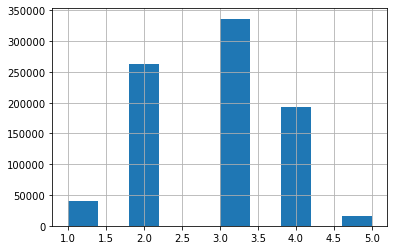

In [383]:
df_train['congestion_cat'].hist()

In [384]:
df_train[df_train['congestion'] == 0]

,row_id,x,y,direction,congestion,Time,congestion_cat
1801,1801,2,1,NW,0,670496400.0,1
3946,3946,2,1,NW,0,670536000.0,1
7456,7456,2,1,NW,0,670600800.0,1
9855,9855,2,0,NB,0,670645200.0,1
9920,9920,2,0,NB,0,670646400.0,1
...,...,...,...,...,...,...,...
841081,841081,2,1,NW,0,686088000.0,1
842362,842362,1,2,EB,0,686112000.0,1
843044,843044,2,3,EB,0,686124000.0,1
845111,845111,2,1,NW,0,686162400.0,1


export = df_train.groupby(['congestion', 'congestion_cat']).size()
export.to_csv(r'C:\Users\nishantjairath\Downloads\congestion.csv')

df_train.to_csv(r'C:\Users\nishantjairath\Downloads\tabular.csv')

In [385]:
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
#df_train = df_train.reset_index()
for train_index, validation_index in split.split(df_train, df_train['congestion_cat']):
    strat_train_set = df_train.loc[train_index]
    strat_validation_set = df_train.loc[validation_index]

In [386]:
strat_train_set

,row_id,x,y,direction,congestion,Time,congestion_cat
27323,27323,1,1,EB,60,670968000.0,3
585280,585280,1,0,SB,34,681296400.0,2
479964,479964,0,1,NB,74,679348800.0,4
750273,750273,2,1,EB,53,684368400.0,3
205037,205037,1,2,EB,66,674265600.0,4
...,...,...,...,...,...,...,...
845403,845403,0,3,NE,35,686168400.0,2
572805,572805,1,1,SB,71,681066000.0,4
347713,347713,1,2,NB,51,676902000.0,3
297208,297208,1,2,NB,52,675969600.0,3


In [387]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679068 entries, 27323 to 452140
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   row_id          679068 non-null  int64   
 1   x               679068 non-null  int64   
 2   y               679068 non-null  int64   
 3   direction       679068 non-null  object  
 4   congestion      679068 non-null  int64   
 5   Time            679068 non-null  float64 
 6   congestion_cat  679068 non-null  category
dtypes: category(1), float64(1), int64(4), object(1)
memory usage: 36.9+ MB


In [388]:
strat_train_set.drop('congestion_cat', axis = 1, inplace = True)

In [389]:
strat_validation_set.drop('congestion_cat', axis =1, inplace = True)

In [390]:
strat_train_set_X = strat_train_set.copy()

In [391]:
strat_train_set_X.drop('congestion', axis = 1, inplace = True)

In [392]:
strat_train_set_y = strat_train_set['congestion']

In [393]:
#One Hot Encoding of Direction

enc = OneHotEncoder(handle_unknown = 'error')

enc_df = pd.DataFrame(enc.fit_transform(strat_train_set_X[['direction']]).toarray())

In [394]:
enc.categories_

[array(['EB', 'NB', 'NE', 'NW', 'SB', 'SE', 'SW', 'WB'], dtype=object)]

In [395]:
col_list = enc.categories_[0].tolist()

In [396]:
col_list

['EB', 'NB', 'NE', 'NW', 'SB', 'SE', 'SW', 'WB']

In [397]:
enc_df

,0,1,2,3,4,5,6,7
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
679063,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
679064,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
679065,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
679066,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [398]:
enc_df.columns =  col_list

In [399]:
enc_df

,EB,NB,NE,NW,SB,SE,SW,WB
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
679063,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
679064,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
679065,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
679066,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [400]:
enc_df['row_id'] = strat_train_set_X['row_id'].values

In [401]:
enc_df

,EB,NB,NE,NW,SB,SE,SW,WB,row_id
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27323
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,585280
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,479964
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,750273
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,205037
...,...,...,...,...,...,...,...,...,...
679063,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,845403
679064,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,572805
679065,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,347713
679066,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,297208


In [402]:
strat_train_set_X

,row_id,x,y,direction,Time
27323,27323,1,1,EB,670968000.0
585280,585280,1,0,SB,681296400.0
479964,479964,0,1,NB,679348800.0
750273,750273,2,1,EB,684368400.0
205037,205037,1,2,EB,674265600.0
...,...,...,...,...,...
845403,845403,0,3,NE,686168400.0
572805,572805,1,1,SB,681066000.0
347713,347713,1,2,NB,676902000.0
297208,297208,1,2,NB,675969600.0


In [403]:
X_train_final = pd.merge(strat_train_set_X, enc_df, on = 'row_id', how = 'outer')

In [404]:
X_train_final.drop('direction', axis = 1, inplace = True)

In [405]:
RF_model = RandomForestRegressor()

In [406]:
X_train_final.head(10)

,row_id,x,y,Time,EB,NB,NE,NW,SB,SE,SW,WB
0,27323,1,1,670968000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,585280,1,0,681296400.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,479964,0,1,679348800.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,750273,2,1,684368400.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,205037,1,2,674265600.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,177035,2,0,673748400.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,414693,2,2,678142800.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,143678,1,2,673125600.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,370033,2,2,677318400.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9,19812,2,2,670828800.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


X_train_final['Dates'] = pd.to_numeric(pd.to_datetime(X_train_final['Dates']))
#X_train_final['Time'] = pd.to_numeric(pd.to_datetime(X_train_final['Time']))

X_train_final['Time'] = X_train_final['Time'].apply(lambda x: x.value)

In [174]:
strat_train_set_y.head(10)

27323     60
585280    34
479964    74
750273    53
205037    66
177035    64
414693    73
143678    39
370033    41
19812     34
Name: congestion, dtype: int64

RF_model.fit(X_train_final, strat_train_set_y)

In [176]:
strat_validation_set

,row_id,x,y,direction,congestion,Time
763979,763979,1,3,NB,55,684621600.0
72024,72024,0,1,NB,70,671793600.0
495100,495100,2,3,NB,58,679627200.0
52519,52519,2,3,WB,41,671432400.0
572758,572758,2,1,EB,78,681064800.0
...,...,...,...,...,...,...
501517,501517,2,0,WB,79,679746000.0
663358,663358,1,3,EB,42,682744800.0
166850,166850,2,3,NB,60,673560000.0
254340,254340,2,3,NB,55,675176400.0


In [187]:
X_validation = strat_validation_set.copy()

In [189]:
X_validation.drop('congestion', axis = 1, inplace = True)

In [190]:
X_validation.head()

,row_id,x,y,direction,Time
763979,763979,1,3,NB,684621600.0
72024,72024,0,1,NB,671793600.0
495100,495100,2,3,NB,679627200.0
52519,52519,2,3,WB,671432400.0
572758,572758,2,1,EB,681064800.0


In [178]:
y_validation = strat_validation_set['congestion'].copy()

In [191]:
enc_df_validation = pd.DataFrame(enc.transform(X_validation[['direction']]).toarray())

In [192]:
col_list

['EB', 'NB', 'NE', 'NW', 'SB', 'SE', 'SW', 'WB']

In [193]:
enc_df_validation

,0,1,2,3,4,5,6,7
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
169762,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
169763,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
169764,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
169765,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [194]:
enc_df_validation.columns =  col_list

In [195]:
enc_df_validation['row_id'] = X_validation['row_id'].values

In [196]:
enc_df_validation

,EB,NB,NE,NW,SB,SE,SW,WB,row_id
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,763979
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,72024
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,495100
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,52519
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,572758
...,...,...,...,...,...,...,...,...,...
169762,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,501517
169763,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,663358
169764,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,166850
169765,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,254340


In [197]:
X_validation_final = pd.merge(X_validation, enc_df_validation, on = 'row_id', how = 'outer')

In [201]:
X_validation_final.drop('direction', axis = 1, inplace = True)

In [203]:
y_validation_predict = RF_model.predict(X_validation_final)

In [205]:
rmse = mean_squared_error(y_validation, y_validation_predict, squared=False)

In [206]:
rmse

9.007943102053174

In [407]:
df_test = pd.read_csv(zf.open('test.csv'))

In [408]:
df_test

,row_id,time,x,y,direction
0,848835,1991-09-30 12:00:00,0,0,EB
1,848836,1991-09-30 12:00:00,0,0,NB
2,848837,1991-09-30 12:00:00,0,0,SB
3,848838,1991-09-30 12:00:00,0,1,EB
4,848839,1991-09-30 12:00:00,0,1,NB
...,...,...,...,...,...
2335,851170,1991-09-30 23:40:00,2,3,NB
2336,851171,1991-09-30 23:40:00,2,3,NE
2337,851172,1991-09-30 23:40:00,2,3,SB
2338,851173,1991-09-30 23:40:00,2,3,SW


df_test['lag'] = df_test.groupby(['x', 'y', 'direction'])['congestion'].shift(1)
df_test.fillna(0, inplace = True)
df_test['ratio'] = df_test['lag']/df_test['congestion']

In [409]:
df_test['Time'] = pd.to_datetime(df_test['time']).map(pd.Timestamp.timestamp)

In [410]:
df_test.drop('time', axis =1 , inplace = True)

In [411]:
enc_df_test = pd.DataFrame(enc.transform(df_test[['direction']]).toarray())

In [412]:
enc_df_test.columns =  col_list

In [413]:
enc_df_test['row_id'] = df_test['row_id'].values

In [414]:
df_test_final = pd.merge(df_test, enc_df_test, on = 'row_id', how = 'outer')

In [415]:
df_test_final

,row_id,x,y,direction,Time,EB,NB,NE,NW,SB,SE,SW,WB
0,848835,0,0,EB,686232000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,848836,0,0,NB,686232000.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,848837,0,0,SB,686232000.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,848838,0,1,EB,686232000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,848839,0,1,NB,686232000.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2335,851170,2,3,NB,686274000.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2336,851171,2,3,NE,686274000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2337,851172,2,3,SB,686274000.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2338,851173,2,3,SW,686274000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [416]:
df_test_final.drop('direction', axis = 1, inplace = True)

In [218]:
y_predicted = RF_model.predict(df_test_final)

In [221]:
y_predicted

array([59.1, 34.5, 53.4, ..., 68.4, 18.9, 26.6])

In [239]:
output_final = (df_test_final['row_id'].copy)

In [226]:
y_pred = pd.DataFrame(y_predicted)

In [243]:
#output = output +pd.DataFrame(y_predicted)

output = pd.DataFrame.join(df_test_final , y_pred)

In [252]:
output.rename(columns = {0 :'congestion'}, inplace = True)

In [253]:
output

,row_id,x,y,Time,EB,NB,NE,NW,SB,SE,SW,WB,congestion
0,848835,0,0,686232000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.1
1,848836,0,0,686232000.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,34.5
2,848837,0,0,686232000.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,53.4
3,848838,0,1,686232000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.2
4,848839,0,1,686232000.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,65.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2335,851170,2,3,686274000.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,55.8
2336,851171,2,3,686274000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,26.8
2337,851172,2,3,686274000.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,68.4
2338,851173,2,3,686274000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,18.9


In [257]:
output_final = output[['row_id', 'congestion']].copy()

output_final.to_csv(r'C:\Users\nishantjairath\Downloads\TabularPlayground.csv')

In [417]:
param_grid = [
    {'n_estimators':[3,10,30], 'max_features': [2,4,6,8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2,3,4]}
]

In [418]:
grid_search = GridSearchCV(RF_model, param_grid, cv = 5, scoring = 'neg_mean_squared_error', return_train_score = True)

In [265]:
grid_search.fit(X_train_final, strat_train_set_y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [275]:
grid_search.best_params_

{'max_features': 2, 'n_estimators': 30}

In [269]:
final_model = grid_search.best_estimator_

In [270]:
final_prediction = final_model.predict(df_test_final)

In [271]:
final_prediction

array([63.03333333, 37.7       , 48.76666667, ..., 68.53333333,
       21.86666667, 34.66666667])

In [272]:
y_pred = pd.DataFrame(final_prediction)

In [273]:
y_pred

,0
0,63.033333
1,37.700000
2,48.766667
3,31.933333
4,63.866667
...,...
2335,57.833333
2336,28.433333
2337,68.533333
2338,21.866667


#y_pred = pd.DataFrame(final_prediction)
output = pd.DataFrame.join(df_test_final , y_pred)
output.rename(columns = {0 :'congestion'}, inplace = True)
output_final = output[['row_id', 'congestion']].copy()
output_final.to_csv(r'C:\Users\nishantjairath\Downloads\TabularPlayground.csv')

In [422]:
enc = OneHotEncoder(handle_unknown = 'error')
enc_df = pd.DataFrame(enc.fit_transform(df_train[['direction']]).toarray())


In [423]:
col_list = enc.categories_[0].tolist()
enc_df.columns =  col_list
enc_df['row_id'] = df_train['row_id'].values

In [424]:
X_train_final = pd.merge(df_train, enc_df, on = 'row_id', how = 'outer')

In [425]:
X_train_final

,row_id,x,y,direction,congestion,Time,congestion_cat,EB,NB,NE,NW,SB,SE,SW,WB
0,0,0,0,EB,70,670464000.0,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,0,NB,49,670464000.0,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0,0,SB,24,670464000.0,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,3,0,1,EB,18,670464000.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0,1,NB,60,670464000.0,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848830,848830,2,3,NB,54,686230800.0,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
848831,848831,2,3,NE,28,686230800.0,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
848832,848832,2,3,SB,68,686230800.0,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
848833,848833,2,3,SW,17,686230800.0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [426]:
X_train_final.drop('direction', axis = 1, inplace = True)

In [427]:
X_train_final

,row_id,x,y,congestion,Time,congestion_cat,EB,NB,NE,NW,SB,SE,SW,WB
0,0,0,0,70,670464000.0,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,0,49,670464000.0,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0,0,24,670464000.0,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,3,0,1,18,670464000.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0,1,60,670464000.0,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848830,848830,2,3,54,686230800.0,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
848831,848831,2,3,28,686230800.0,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
848832,848832,2,3,68,686230800.0,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
848833,848833,2,3,17,686230800.0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [428]:
y_train = X_train_final['congestion'].copy()

In [429]:
y_train

0         70
1         49
2         24
3         18
4         60
          ..
848830    54
848831    28
848832    68
848833    17
848834    24
Name: congestion, Length: 848835, dtype: int64

In [430]:
X_train_final.drop('congestion', axis = 1, inplace = True)

In [431]:
X_train_final.drop('congestion_cat', axis = 1, inplace = True)

from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha = 0.1, l1_ratio = 0.5, tol = 0.001)

elastic_net.fit(X_train_final, y_train)

final_prediction = elastic_net.predict(df_test_final)

y_pred = pd.DataFrame(final_prediction)
output = pd.DataFrame.join(df_test_final , y_pred)
output.rename(columns = {0 :'congestion'}, inplace = True)
output_final = output[['row_id', 'congestion']].copy()
output_final.to_csv(r'C:\Users\nishantjairath\Downloads\TabularPlayground.csv')

y_train

In [433]:
X_train_final.drop('EB', axis =1, inplace = True)

In [434]:
grid_search.fit(X_train_final, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [435]:
grid_search.best_params_

{'max_features': 2, 'n_estimators': 30}

In [436]:
final_model = grid_search.best_estimator_

In [437]:
df_test_final

,row_id,x,y,Time,EB,NB,NE,NW,SB,SE,SW,WB
0,848835,0,0,686232000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,848836,0,0,686232000.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,848837,0,0,686232000.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,848838,0,1,686232000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,848839,0,1,686232000.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2335,851170,2,3,686274000.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2336,851171,2,3,686274000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2337,851172,2,3,686274000.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2338,851173,2,3,686274000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [342]:
df_test_final[(df_test_final['x'] == 1) & (df_test_final['y'] == 1) & (df_test_final['EB'] == 1)]

,row_id,x,y,Time,EB,NB,NE,NW,SB,SE,SW,WB
23,848858,1,1,686232000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88,848923,1,1,686233200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
153,848988,1,1,686234400.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
218,849053,1,1,686235600.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
283,849118,1,1,686236800.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
348,849183,1,1,686238000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
413,849248,1,1,686239200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
478,849313,1,1,686240400.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
543,849378,1,1,686241600.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,849443,1,1,686242800.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [438]:
df_test_final.drop('EB', axis = 1, inplace = True)

In [439]:
predictions = final_model.predict(df_test_final)

In [440]:
y_pred = pd.DataFrame(predictions)
output = pd.DataFrame.join(df_test_final , y_pred)
output.rename(columns = {0 :'congestion'}, inplace = True)
output_final = output[['row_id', 'congestion']].copy()
output_final.to_csv(r'C:\Users\nishantjairath\Downloads\TabularPlayground.csv')

In [82]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17654 entries, 0 to 17653
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     17654 non-null  float64
 1   vintage                         17654 non-null  float64
 2   age                             17654 non-null  float64
 3   gender                          17654 non-null  object 
 4   dependents                      17654 non-null  float64
 5   occupation                      17654 non-null  object 
 6   customer_nw_category            17654 non-null  object 
 7   branch_code                     17654 non-null  float64
 8   days_since_last_transaction     17654 non-null  float64
 9   current_balance                 16939 non-null  float64
 10  previous_month_end_balance      17654 non-null  float64
 11  average_monthly_balance_prevQ   17654 non-null  float64
 12  average_monthly_balance_prevQ2  

In [80]:
df_train['occupation'] = df_train['occupation'].ffill()

In [83]:
df_train.head()

,customer_id,vintage,age,gender,dependents,occupation,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1.0,3135.0,66.0,Male,0.0,Engineer,Medium,755.0,224.0,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,NaN,1458.71,1458.71,Yes
1,6.0,2531.0,42.0,Male,2.0,Engineer,Low,388.0,58.0,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,No
2,7.0,263.0,42.0,Female,0.0,Engineer,Medium,1666.0,60.0,15202.20,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,Yes
3,8.0,5922.0,72.0,Male,0.0,Lawyer,High,1.0,98.0,7006.93,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,Yes
4,9.0,1145.0,46.0,Male,0.0,Engineer,Medium,317.0,172.0,10096.58,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,Yes


In [81]:
df_train.describe()

,customer_id,vintage,age,dependents,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance
count,17654.000000,17654.000000,17654.000000,17654.000000,17654.000000,17654.000000,1.693900e+04,1.765400e+04,1.765400e+04,17654.000000,1.765400e+04,1.765400e+04,1.765400e+04,1.676700e+04,1.683800e+04,1.765400e+04
mean,12087.904044,2548.803274,47.963011,0.376629,875.724708,67.044579,7.168881e+03,7.222929e+03,7.194549e+03,6723.439337,3.509008e+03,3.797951e+03,3.812341e+03,3.709473e+03,7.216016e+03,7.194303e+03
std,6987.684541,1599.755612,16.422730,1.063252,903.755183,83.983477,2.055108e+04,2.089998e+04,1.914165e+04,17403.866869,2.849671e+04,3.451301e+04,2.671132e+04,2.472173e+04,1.980531e+04,2.109868e+04
min,1.000000,180.000000,1.000000,0.000000,1.000000,0.000000,-5.503960e+03,-3.145380e+03,1.428690e+03,-16506.100000,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03
25%,6017.250000,1320.000000,36.000000,0.000000,158.000000,11.000000,1.778495e+03,1.907295e+03,2.205062e+03,1818.735000,3.600000e-01,3.700000e-01,4.700000e-01,4.900000e-01,2.018862e+03,2.087055e+03
50%,12109.500000,2205.000000,46.000000,0.000000,538.000000,28.000000,3.335280e+03,3.432845e+03,3.590405e+03,3391.805000,9.050000e-01,5.030000e+00,2.146150e+02,2.232700e+02,3.503995e+03,3.505955e+03
75%,18131.750000,3377.750000,60.000000,0.000000,1375.000000,90.000000,6.820100e+03,6.882498e+03,6.868970e+03,6663.795000,9.938550e+02,1.142925e+03,1.582697e+03,1.664615e+03,6.855000e+03,6.810690e+03
max,24212.000000,11353.000000,90.000000,52.000000,4782.000000,365.000000,1.076091e+06,1.001124e+06,1.192704e+06,856596.510000,1.764286e+06,2.361808e+06,1.764286e+06,1.414168e+06,1.074625e+06,1.326487e+06


# Descriptive Analysis

(array([10762.,     0.,  1314.,     0.,     0.,  4465.,     0.,  1096.,
            0.,    17.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

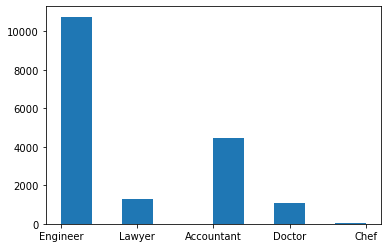

In [84]:
plt.hist(x = df_train['occupation'].astype(str))

# use one-hot-encoding for occupation

In [23]:
df_train['branch_code'].nunique()

# convert branch_code to string

2731

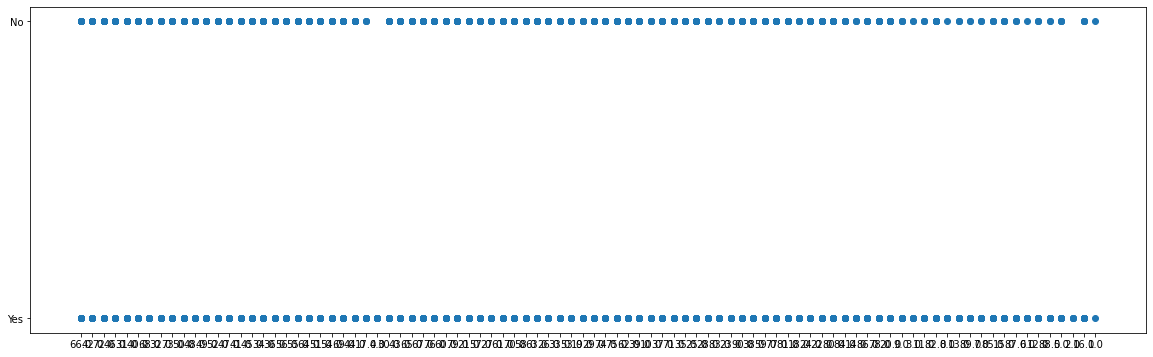

In [40]:
plt.figure(figsize=(20,6))
plt.scatter(x = df_train['age'].astype(str), y = df_train['churn'])

In [30]:
df_train['branch_code'].value_counts()

60.0      90
6.0       90
19.0      86
16.0      71
27.0      69
          ..
2709.0     1
2920.0     1
1342.0     1
2478.0     1
3466.0     1
Name: branch_code, Length: 2731, dtype: int64

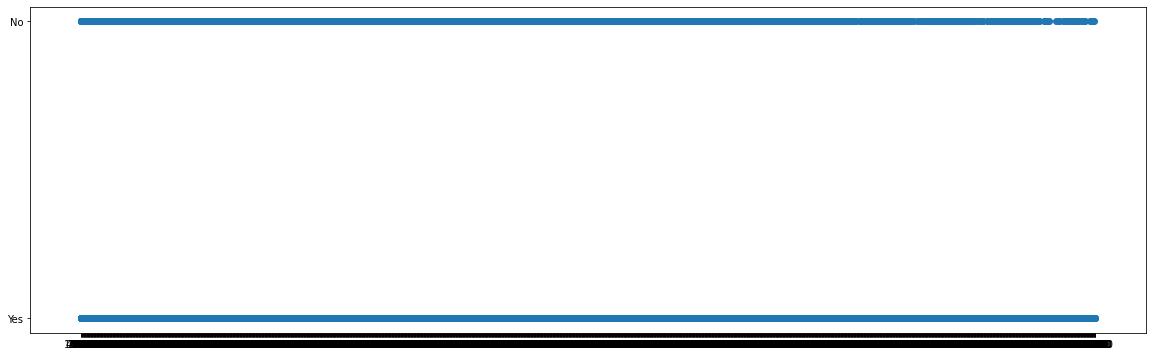

In [41]:
plt.figure(figsize=(20,6))
plt.scatter(x = df_train['branch_code'].astype(str), y = df_train['churn'])

# Feature Engineering

In [85]:
# converting branch_code to string

df_train['branch_code'] = df_train['branch_code'].astype('category')

In [86]:
df_train['branch_code'].dtype

CategoricalDtype(categories=[   1.0,    2.0,    3.0,    4.0,    5.0,    6.0,    7.0,
                     8.0,    9.0,   10.0,
                  ...
                  4499.0, 4672.0, 4705.0, 4711.0, 4715.0, 4720.0, 4724.0,
                  4737.0, 4753.0, 4782.0],
, ordered=False)

In [87]:
df_train.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'customer_nw_category', 'branch_code', 'days_since_last_transaction',
       'current_balance', 'previous_month_end_balance',
       'average_monthly_balance_prevQ', 'average_monthly_balance_prevQ2',
       'current_month_credit', 'previous_month_credit', 'current_month_debit',
       'previous_month_debit', 'current_month_balance',
       'previous_month_balance', 'churn'],
      dtype='object')

In [110]:
# One-hot-encoding of occupation

#y = pd.get_dummies(df_train.occupation, prefix='Occupation', drop = 'first')

enc = OneHotEncoder(handle_unknown = 'error')

enc_df = pd.DataFrame(enc.fit_transform(df_train[['occupation']]).toarray())

In [111]:
enc.categories_

[array(['Accountant', 'Chef', 'Doctor', 'Engineer', 'Lawyer'], dtype=object)]

In [112]:
col_list = enc.categories_[0].tolist()

In [113]:
col_list

['Accountant', 'Chef', 'Doctor', 'Engineer', 'Lawyer']

In [114]:
enc_df

,0,1,2,3,4
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
17649,0.0,0.0,0.0,1.0,0.0
17650,0.0,0.0,0.0,1.0,0.0
17651,0.0,0.0,0.0,1.0,0.0
17652,0.0,0.0,0.0,1.0,0.0


In [115]:
enc_df.columns =  col_list

In [116]:
enc_df

,Accountant,Chef,Doctor,Engineer,Lawyer
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
17649,0.0,0.0,0.0,1.0,0.0
17650,0.0,0.0,0.0,1.0,0.0
17651,0.0,0.0,0.0,1.0,0.0
17652,0.0,0.0,0.0,1.0,0.0


In [117]:
df_train = df_train.join(enc_df)

In [118]:
df_train.head()

,customer_id,vintage,age,gender,dependents,occupation,customer_nw_category,branch_code,days_since_last_transaction,current_balance,...,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,Accountant,Chef,Doctor,Engineer,Lawyer
0,1.0,3135.0,66.0,Male,0.0,Engineer,Medium,755.0,224.0,1458.71,...,0.20,NaN,1458.71,1458.71,Yes,0.0,0.0,0.0,1.0,0.0
1,6.0,2531.0,42.0,Male,2.0,Engineer,Low,388.0,58.0,927.72,...,588.62,1538.06,1157.15,1677.16,No,0.0,0.0,0.0,1.0,0.0
2,7.0,263.0,42.0,Female,0.0,Engineer,Medium,1666.0,60.0,15202.20,...,857.50,286.07,15719.44,15349.75,Yes,0.0,0.0,0.0,1.0,0.0
3,8.0,5922.0,72.0,Male,0.0,Lawyer,High,1.0,98.0,7006.93,...,1299.64,439.26,7076.06,7755.98,Yes,0.0,0.0,0.0,0.0,1.0
4,9.0,1145.0,46.0,Male,0.0,Engineer,Medium,317.0,172.0,10096.58,...,443.13,5688.44,8563.84,5317.04,Yes,0.0,0.0,0.0,1.0,0.0


In [120]:
df_train.drop('occupation', axis =1, inplace = True)

In [121]:
df_train.head()

,customer_id,vintage,age,gender,dependents,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,...,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,Accountant,Chef,Doctor,Engineer,Lawyer
0,1.0,3135.0,66.0,Male,0.0,Medium,755.0,224.0,1458.71,1458.71,...,0.20,NaN,1458.71,1458.71,Yes,0.0,0.0,0.0,1.0,0.0
1,6.0,2531.0,42.0,Male,2.0,Low,388.0,58.0,927.72,1401.72,...,588.62,1538.06,1157.15,1677.16,No,0.0,0.0,0.0,1.0,0.0
2,7.0,263.0,42.0,Female,0.0,Medium,1666.0,60.0,15202.20,16059.34,...,857.50,286.07,15719.44,15349.75,Yes,0.0,0.0,0.0,1.0,0.0
3,8.0,5922.0,72.0,Male,0.0,High,1.0,98.0,7006.93,7714.19,...,1299.64,439.26,7076.06,7755.98,Yes,0.0,0.0,0.0,0.0,1.0
4,9.0,1145.0,46.0,Male,0.0,Medium,317.0,172.0,10096.58,8519.53,...,443.13,5688.44,8563.84,5317.04,Yes,0.0,0.0,0.0,1.0,0.0


In [125]:
cols_list = ['current_balance', 'previous_month_debit', 'current_month_balance']

for cols in cols_list:
    df_train[cols] = df_train[cols].fillna(0)

In [126]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17654 entries, 0 to 17653
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   customer_id                     17654 non-null  float64 
 1   vintage                         17654 non-null  float64 
 2   age                             17654 non-null  float64 
 3   gender                          17654 non-null  object  
 4   dependents                      17654 non-null  float64 
 5   customer_nw_category            17654 non-null  object  
 6   branch_code                     17654 non-null  category
 7   days_since_last_transaction     17654 non-null  float64 
 8   current_balance                 17654 non-null  float64 
 9   previous_month_end_balance      17654 non-null  float64 
 10  average_monthly_balance_prevQ   17654 non-null  float64 
 11  average_monthly_balance_prevQ2  17654 non-null  float64 
 12  current_month_cred

In [135]:
#LabelEncoding - gender, customer_nw_category, churn

label_encoder = LabelEncoder()

cols_list = ['gender', 'customer_nw_category', 'churn']

for cols in cols_list:
    df_train[cols] = label_encoder.fit_transform(df_train[cols])

In [136]:
df_train.head()

,customer_id,vintage,age,gender,dependents,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,...,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,Accountant,Chef,Doctor,Engineer,Lawyer
0,1.0,3135.0,66.0,1,0.0,2,755.0,224.0,1458.71,1458.71,...,0.20,0.00,1458.71,1458.71,1,0.0,0.0,0.0,1.0,0.0
1,6.0,2531.0,42.0,1,2.0,1,388.0,58.0,927.72,1401.72,...,588.62,1538.06,1157.15,1677.16,0,0.0,0.0,0.0,1.0,0.0
2,7.0,263.0,42.0,0,0.0,2,1666.0,60.0,15202.20,16059.34,...,857.50,286.07,15719.44,15349.75,1,0.0,0.0,0.0,1.0,0.0
3,8.0,5922.0,72.0,1,0.0,0,1.0,98.0,7006.93,7714.19,...,1299.64,439.26,7076.06,7755.98,1,0.0,0.0,0.0,0.0,1.0
4,9.0,1145.0,46.0,1,0.0,2,317.0,172.0,10096.58,8519.53,...,443.13,5688.44,8563.84,5317.04,1,0.0,0.0,0.0,1.0,0.0


# Modeling

In [137]:
df_train_X = df_train.copy()
df_train_X.drop('churn', axis = 1, inplace = True)

In [138]:
df_train_y = df_train['churn'].copy()

In [139]:
rf = RandomForestClassifier()

In [140]:
rf.fit(df_train_X, df_train_y)

RandomForestClassifier()